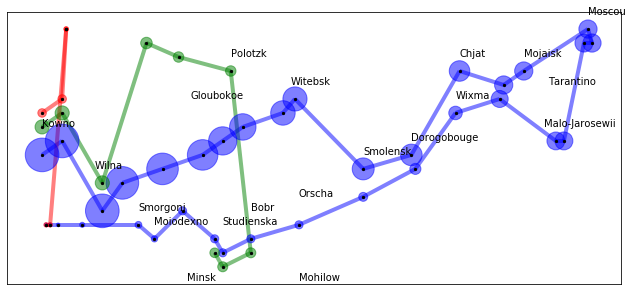

In [2]:
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2006-2019 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import matplotlib.pyplot as plt
import networkx as nx


def minard_graph():
    data1 = """\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2 = """\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3 = """\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities = """\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c = {}
    for line in cities.split('\n'):
        x, y, name = line.split(',')
        c[name] = (float(x), float(y))

    g = []

    for data in [data1, data2, data3]:
        G = nx.Graph()
        i = 0
        G.pos = {}  # location
        G.pop = {}  # size
        last = None
        for line in data.split('\n'):
            x, y, p, r, n = line.split(',')
            G.pos[i] = (float(x), float(y))
            G.pop[i] = int(p)
            if last is None:
                last = i
            else:
                G.add_edge(i, last, **{r: int(n)})
                last = i
            i = i + 1
        g.append(G)

    return g, c


if __name__ == "__main__":

    (g, city) = minard_graph()

    plt.figure(1, figsize=(11, 5))
    plt.clf()
    colors = ['b', 'g', 'r']
    for G in g:
        c = colors.pop(0)
        node_size = [int(G.pop[n] / 300.0) for n in G]
        nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
        nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
        nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color='k')

    for c in city:
        x, y = city[c]
        plt.text(x, y + 0.1, c)
    plt.show()

In [9]:
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G,'a','d'))

['a', 'c', 'd']


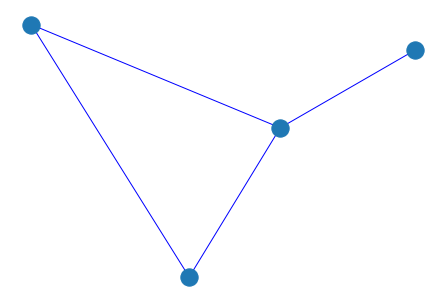

In [12]:
#G=nx.cubical_graph()
#nx.draw(G)   # тип по умолчанию spring_layout
nx.draw(G,pos=nx.spectral_layout(G), nodecolor='r',edge_color='b')

In [25]:
# libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_columns = 20
df = pd.DataFrame([[1, 1, 1], [2, 1, 1],[0, 1, 1]])
df

,0,1,2
0,1,1,1
1,2,1,1
2,0,1,1


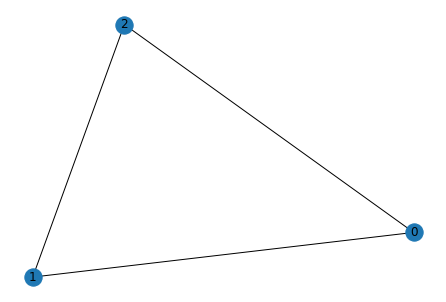

In [26]:
# Build a dataframe with 4 connections
#df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# Build your graph
G=nx.from_pandas_adjacency(df)
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [27]:
import pandas as pd
pd.options.display.max_columns = 20
import numpy as np

rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(3,2))
a = ['A', 'B', 'C']
b = ['D', 'A', 'E']
df = pd.DataFrame(ints, columns=['weight', 'cost'])
df[0] = a
df['b'] = b
df[['weight', 'cost', 0, 'b']]
df

,weight,cost,0,b
0,4,7,A,D
1,7,1,B,A
2,10,9,C,E


In [28]:
G = nx.from_pandas_edgelist(df, 0, 'b', ['weight', 'cost'])
G['E']['C']['weight']


10

In [29]:
G['E']['C']['cost']

9

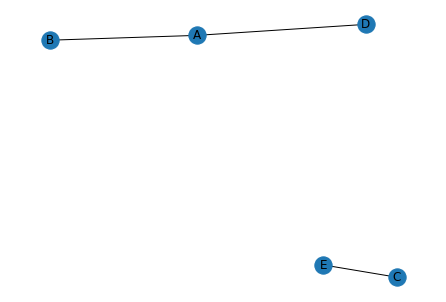

In [33]:
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
edges = pd.DataFrame({'source': [0, 1, 2],'target': [2, 2, 3],'weight': [3, 4, 5],'color': ['red', 'blue', 'blue']})
G = nx.from_pandas_edgelist(edges, edge_attr=True)
G[0][2]['color']

In [37]:
import cx_Oracle

dsn_tns = cx_Oracle.makedsn('ORBITOP', 1521, service_name='XE') 

# if needed, place an 'r' before any parameter in order to address special characters such as '\'.

conn = cx_Oracle.connect(user=r'orbitiumnos', password='legomania97', dsn=dsn_tns) 

# if needed, place an 'r' before any parameter in order to address special characters such as '\'. For example, if your user name contains '\', you'll need to place 'r' before the user name: user=r'User Name'

c = conn.cursor()
c.execute('select * from spaces_dependence') 

# use triple quotes if you want to spread your query across multiple lines

for row in c:
    print (row[0], '-', row[1], '-', row[2])
# this only shows the first two columns. To add an additional column you'll need to add , '-', row[2], etc.

#conn.close()

STG - ODS - OK
ODS - CONV - OK
ODS - SYN - OK
CONV - LINK_APP_REQUEST - OK
LINK_APP_REQUEST - DDS - ERROR
DDS - CALC - None
CALC - MARTS - None
CALC - PDN - None
CALC - CALC_LINK_APP_PREAPP - None
MARTS - REPORTS - None


In [44]:
import cx_Oracle
ip = 'ORBITOP'
port = 1521
SID = 'XE'
dsn_tns = cx_Oracle.makedsn(ip, port, SID)

connection = cx_Oracle.connect('orbitiumnos', 'legomania97', dsn_tns)

query = """SELECT* 
           FROM spaces_dependence
           """
df_ora = pd.read_sql(query, con=connection)

connection.close()

In [52]:
conditions = [
    (df_ora['STATUS'] == 'OK'),
    (df_ora['STATUS'] == 'ERROR'),
    (df_ora['STATUS'].isnull())]
choices = ['green', 'red', 'black']
#df_ora['COLOR'] = np.select(conditions, choices, default='black')

In [48]:
df_ora

,FATHER,CHILD,STATUS,COLOR
0,STG,ODS,OK,green
1,ODS,CONV,OK,green
2,ODS,SYN,OK,green
3,CONV,LINK_APP_REQUEST,OK,green
4,LINK_APP_REQUEST,DDS,ERROR,red
5,DDS,CALC,None,purple
6,CALC,MARTS,None,purple
7,CALC,PDN,None,purple
8,CALC,CALC_LINK_APP_PREAPP,None,purple
9,MARTS,REPORTS,None,purple


In [50]:
G = nx.from_pandas_edgelist(df_ora, 'FATHER', 'CHILD',['COLOR'])

In [72]:
for node in G:
    print(node)

STG
ODS
CONV
SYN
LINK_APP_REQUEST
DDS
CALC
MARTS
PDN
CALC_LINK_APP_PREAPP
REPORTS


In [77]:
connection = cx_Oracle.connect('orbitiumnos', 'legomania97', dsn_tns)

query = """SELECT* 
           FROM reglament_status
           """
df_status = pd.read_sql(query, con=connection)

connection.close()

def get_status(node):
    return df_status[df_status['STAGE']==node]['STATUS'].values[0]

color_map = []

for node in G:
    
    if get_status(node) == 'OK':
        color_map.append('green')
    elif get_status(node) == 'ERROR':
        color_map.append('red')
    else: 
        color_map.append('white')
        
    print(node, get_status(node))

STG OK
ODS OK
CONV OK
SYN OK
LINK_APP_REQUEST ERROR
DDS None
CALC None
MARTS None
PDN None
CALC_LINK_APP_PREAPP None
REPORTS None


In [78]:
color_map

['green',
 'green',
 'green',
 'green',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white']

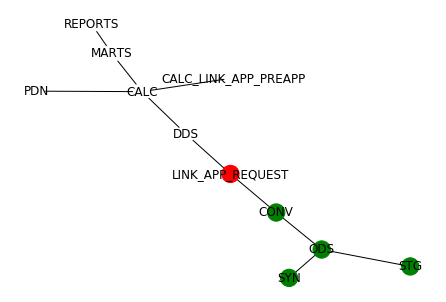

In [79]:
nx.draw(G, node_color = color_map, with_labels=True)
plt.show()

In [ ]:
plt.figure(1, figsize=(11, 5))
plt.clf()

#colors = ['b', 'g', 'r']
for G in g:
#c = colors.pop(0)

    #node_size = [int(G.pop[n] / 300.0) for n in G]
    nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color='k')

plt.show()